<a href="https://colab.research.google.com/github/nehashah2898/AIPI590/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment 1
### Interpretable ML
### Neha Shah

#### Include the button below. Change the link to the location in your github repository:
#### Example: https://colab.research.google.com/github/nehashah2898/AIPI590/blob/main/Assignment1.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/templates/Assignment1.ipynb)

Data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

## Tasks

* Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.

* Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.

* Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.

* Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.
Model Comparison: Compare the performance and interpretability of the different models you built.

* Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.

# Exploratory Data Analysis

In [53]:
# !pip install pygam
from pygam import LogisticGAM, s, f
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


file_path = '/content/AIPI590/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df.drop(columns=['customerID', 'Churn']), drop_first=True)

X = df_encoded
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Linear Regression

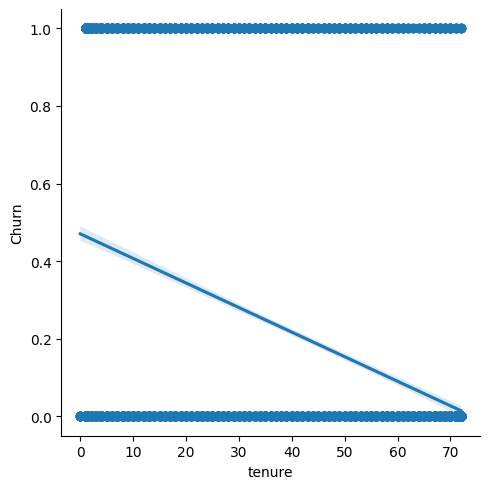

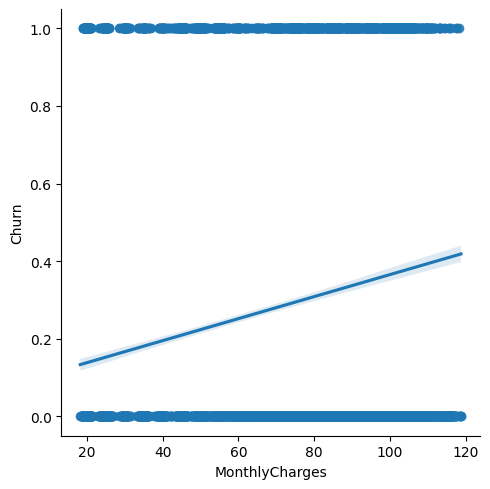

In [56]:

sns.lmplot(x='tenure', y='Churn', data=df, logistic=False)
sns.lmplot(x='MonthlyCharges', y='Churn', data=df, logistic=False)

In [57]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

y_pred_binary = np.where(y_pred > 0.5, 1, 0)

linear_accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {linear_accuracy}')

Mean Squared Error: 0.19444412251648915
R-squared: 0.0021566318894695735
Accuracy Score: 0.7382169222032936


In [58]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
coefficients['abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                   Feature  Coefficient
1960    TotalCharges_229.6     1.345902
3372   TotalCharges_390.85     1.322063
5308   TotalCharges_663.05     1.277444
1991   TotalCharges_233.55     1.272895
1645    TotalCharges_20.55     1.252567
...                    ...          ...
5890  TotalCharges_7689.95     0.000000
5882   TotalCharges_767.55     0.000000
5241   TotalCharges_651.55     0.000000
5937     TotalCharges_78.3     0.000000
5864   TotalCharges_762.25     0.000000

[6559 rows x 2 columns]


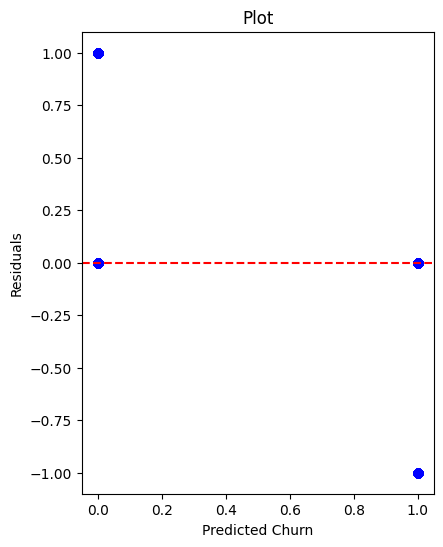

In [63]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Churn')
plt.ylabel('Residuals')
plt.title('Plot')

plt.show()

# Logistic Regression


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


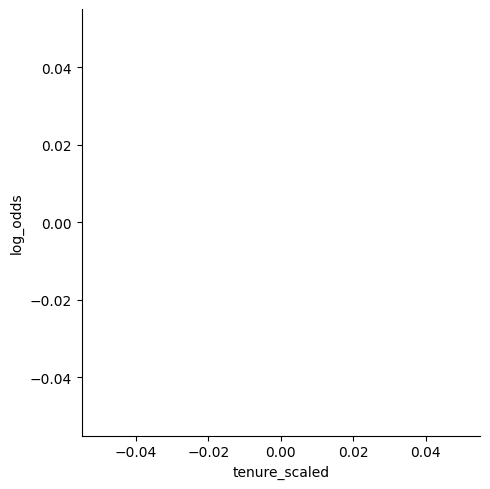

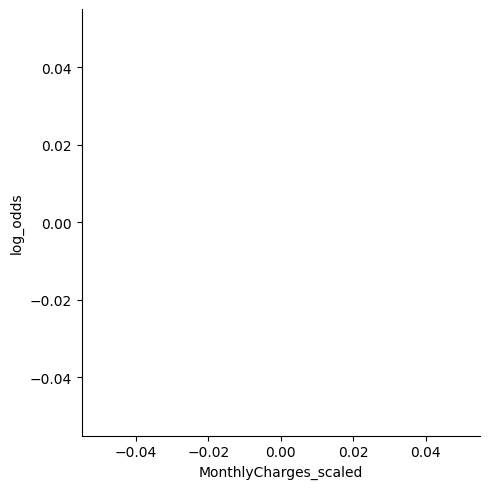

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure_scaled', 'MonthlyCharges_scaled']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])
df['log_odds'] = np.log(df['Churn'] / (1 - df['Churn']))

sns.lmplot(x='tenure_scaled', y='log_odds', data=df)
sns.lmplot(x='MonthlyCharges_scaled', y='log_odds', data=df)

In [61]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {logistic_accuracy}')

Accuracy: 0.7978421351504826


In [62]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients['abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='abs_Coefficient', ascending=False)

print("Top 20 most influential features based on Logistic Regression coefficients:")
print(coefficients[['Feature', 'Coefficient']].head(20))

Top 20 most influential features based on Logistic Regression coefficients:
                          Feature  Coefficient
1636            TotalCharges_20.1     1.493030
1637           TotalCharges_20.15     1.328144
24              Contract_Two year    -1.263866
1638            TotalCharges_20.2     1.218693
2270           TotalCharges_259.8     1.187545
2516          TotalCharges_288.05     1.112344
3840            TotalCharges_45.1     1.056112
3850            TotalCharges_45.7     1.025927
5755           TotalCharges_740.3     1.018609
1521           TotalCharges_19.95     0.995554
1644            TotalCharges_20.5     0.990675
3854           TotalCharges_45.95     0.967234
9     InternetService_Fiber optic     0.961443
4058         TotalCharges_4759.75     0.950655
2676          TotalCharges_3046.4     0.947326
621          TotalCharges_1327.15     0.940581
4361          TotalCharges_5154.6     0.939617
5850           TotalCharges_76.35     0.939342
5208         TotalCharges_6440.

# Generalized Additive Model (GAM)

<Axes: xlabel='tenure', ylabel='Churn'>

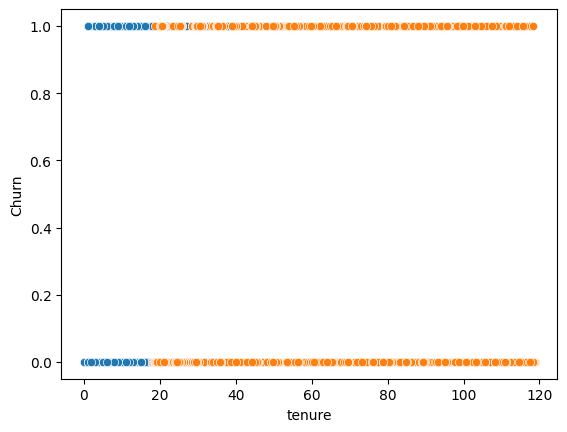

In [68]:
sns.scatterplot(x='tenure', y='Churn', data=df)
sns.scatterplot(x='MonthlyCharges', y='Churn', data=df)

In [67]:
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + f(4) + f(5) + f(6) + f(7) + f(8) + f(9))
gam.fit(X_train, y_train)

y_pred_proba = gam.predict_proba(X_test)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

GAM_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {GAM_accuracy}')

Accuracy: 0.7921635434412265


# Model Comparison

In [69]:
print(f'Linear Regression Accuracy: {linear_accuracy}')
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'GAM Accuracy: {GAM_accuracy}')

Linear Regression Accuracy: 0.7382169222032936
Logistic Regression Accuracy: 0.7978421351504826
GAM Accuracy: 0.7921635434412265


In comparing the three models, logistic regression emerged as the most effective approach, achieving the highest accuracy while providing interpretable results through log-odds coefficients that translate into meaningful business insights, such as how contract type or monthly charges influence churn probability.
The GAM model performed almost as well and offered additional value by uncovering non-linear relationships, for example, showing how churn risk decreases sharply after the first year of tenure and then stabilizes. Linear regression, while simpler, is not statistically well-suited for binary outcomes and produced slightly lower accuracy, making it less reliable for predicting churn. Overall, the telecommunications company should adopt logistic regression as its primary model due to its strong balance of accuracy and interpretability, while using GAM selectively to capture non-linear patterns that can inform targeted retention strategies.